# Setup and loading data for rate_quote.csv

DONE.


* Merge broker names into rate_quote file (Broker contracts)
* Line graphs of hot dates for all brokers on request data
* Line graphs of hot dates for all brokers on reservation data
* Same as above for combined data of all brokers..
* Faster algorithm to find "hot days" - should be done: Tested. Should write a writeup for the algorithm.. Could also be used as one piece for poster
* Count of requests per day per broker


TODO. 

* Tidy up all the work here.
* Pick better graph formats / Make new graphs... Interactive maybe or graphs to show outliers/unexpected stuff. To allow user to see which days are really the peak. 
* Find outliers by first calculating variance/standard deviation separately for weekdays. In order to find unexpected peaks.
* Create a pipeline program? Feed in data -> output
* For finding unexpected peaks - decrease time interval from days to seconds or minutes? quarter hours? Half hours? Hours? Check if there are really a lot of requests at some point..
* Charts to show how many requests are for: tomorrow, next 3 days, next 7 days?? .. Or how to present what percentage of stuff is done in a time.
* Same stuff after removing duplicates.
* Use plotly to make interactive graph (easier to see when are peaks ... )
* Same analysis on other data sets.

In [1]:
import pandas as pd
import csv
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 6)
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
fields = ["timestamp", "pickup_timestamp", "return_timestamp", "broker_contract_id"]
df = pd.read_csv("rate_quote.csv", skipinitialspace=True, usecols=fields)
print(df.shape)

(2997586, 4)


In [3]:
df["timestamp"] = pd.to_datetime(df['timestamp'])
df["pickup_timestamp"] = pd.to_datetime(df['pickup_timestamp'])
df["return_timestamp"] = pd.to_datetime(df['return_timestamp'])
print(df.dtypes)


timestamp             datetime64[ns]
pickup_timestamp      datetime64[ns]
return_timestamp      datetime64[ns]
broker_contract_id             int64
dtype: object


## Broker contracts

Map contracts to certain broker

In [4]:
fields = ["Contract_ID", "Contract_name", "Broker name"]
contract_df = pd.read_csv("broker_contracts.csv", skipinitialspace=True, usecols=fields)
contract_df["Broker name"] = contract_df["Broker name"].astype(str)
contract_df["Contract_name"] = contract_df["Contract_name"].astype(str)
# This holds contract names and which broker name corresponds to each contract id..
#contract_df = contract_df.set_index("Contract_ID")

print(contract_df.shape)
print(contract_df.dtypes)


# What different contractors are there?
contractors = set(contract_df["Broker name"])
print("Different contractors:", contractors)

# For broker, find which contract ids it has
from collections import defaultdict

broker_contract_ids = defaultdict(set)
for row in contract_df.itertuples():
    broker_contract_ids[row[3]].add(row[0])


contract_df.columns = ["broker_contract_id", "Contract_name", "Broker_name"]
    
#print(df)
    
    
merged_requests = pd.merge(df, contract_df, on=["broker_contract_id"])

print(merged_requests.dtypes)
# Create new, merged table, with contractor name in each.

(27, 3)
Contract_ID       int64
Contract_name    object
Broker name      object
dtype: object
Different contractors: {'RateChain test', 'CarTrawler', 'Clarify Car Hire', 'Flexible Autos', 'BSP Auto', 'Skyscanner', 'FTI', 'Zuzuche', 'TravelJigsaw', 'Atlantic Choice', 'SupplierWebsite', 'CDM-AE-CR', 'Online Republic'}
timestamp             datetime64[ns]
pickup_timestamp      datetime64[ns]
return_timestamp      datetime64[ns]
broker_contract_id             int64
Contract_name                 object
Broker_name                   object
dtype: object


In [5]:
contract_df

,broker_contract_id,Contract_name,Broker_name
0,4,Dollar Global rates for Expedia Inc (Carrental...,CDM-AE-CR
1,25,sagacarrental.is website,SupplierWebsite
2,27,Dollar Global rates for CarTrawler,CarTrawler
3,3,Thrifty Global rates Expedia Inc (Carrentals...,CDM-AE-CR
4,7,Dollar rates for Online Republic,Online Republic
5,28,Thrifty Global rates for CarTrawler,CarTrawler
6,26,Dollar Basic for Car Trawler,CarTrawler
7,23,Thrifty.is website,SupplierWebsite
8,24,dollar.is website,SupplierWebsite
9,22,Saga rates for skyscanner,Skyscanner


In [6]:
t = 2e6
t = 1
print(df["timestamp"][t])
print(df["pickup_timestamp"][t])
print(df["return_timestamp"][t])

2017-12-03 15:32:01.143000
2018-02-15 11:30:00
2018-02-22 11:30:00


# Analysing data

## Number of requests per day


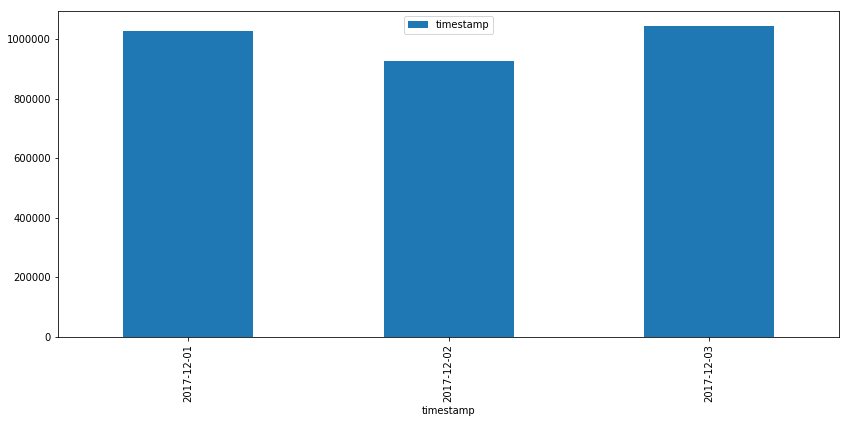

In [7]:
# requests per datetime
df_requests = pd.DataFrame(df["timestamp"])
requests_per_day = df_requests.groupby(df_requests["timestamp"].dt.date).count()
requests_per_day.plot.bar()

### Collect for each contractor separately





Text(0,0.5,'Request count')

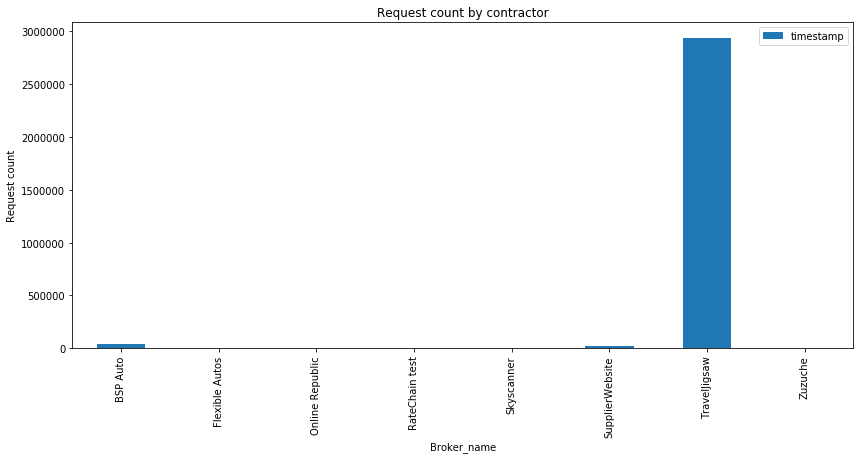

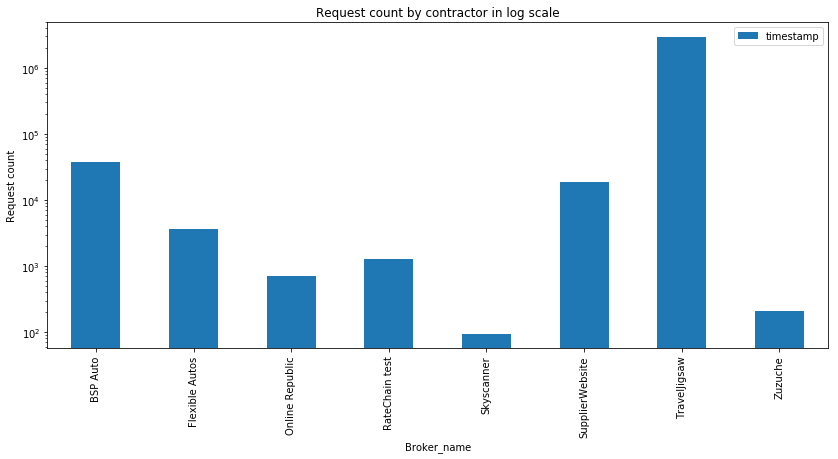

In [8]:

reqs_separately = merged_requests[["timestamp", "Broker_name"]]
requests_per_contract_ = reqs_separately.groupby(reqs_separately["Broker_name"])

requests_per_contractor = requests_per_contract_.count().plot(kind="bar", title="Request count by contractor")
requests_per_contractor.set_ylabel("Request count")


requests_per_contractor = reqs_separately.groupby(reqs_separately["Broker_name"]).count().plot(kind="bar", title="Request count by contractor in log scale")
requests_per_contractor.set_yscale("log", nonposy='clip')
requests_per_contractor.set_ylabel("Request count")



### Requests per day per contractor

In [160]:
for group in requests_per_contract_:
    print(group)

('BSP Auto',                       timestamp Broker_name
2715443 2017-12-03 15:32:06.345    BSP Auto
2715444 2017-12-03 15:32:06.354    BSP Auto
2715445 2017-12-03 15:32:06.362    BSP Auto
2715446 2017-12-03 15:32:06.371    BSP Auto
2715447 2017-12-03 15:32:06.379    BSP Auto
2715448 2017-12-03 15:32:06.388    BSP Auto
2715449 2017-12-03 15:32:06.396    BSP Auto
2715450 2017-12-03 15:32:06.404    BSP Auto
2715451 2017-12-03 15:32:06.414    BSP Auto
2715452 2017-12-03 15:32:06.425    BSP Auto
2715453 2017-12-03 15:32:06.436    BSP Auto
2715454 2017-12-03 15:32:06.447    BSP Auto
2715455 2017-12-03 15:32:06.458    BSP Auto
2715456 2017-12-03 15:32:06.470    BSP Auto
2715457 2017-12-03 15:32:06.479    BSP Auto
2715458 2017-12-03 15:32:06.490    BSP Auto
2715459 2017-12-03 15:32:06.501    BSP Auto
2715460 2017-12-03 15:32:06.510    BSP Auto
2715461 2017-12-03 15:32:06.519    BSP Auto
2715462 2017-12-03 15:32:06.536    BSP Auto
2715463 2017-12-03 15:32:06.556    BSP Auto
2715464 2017-12-03 

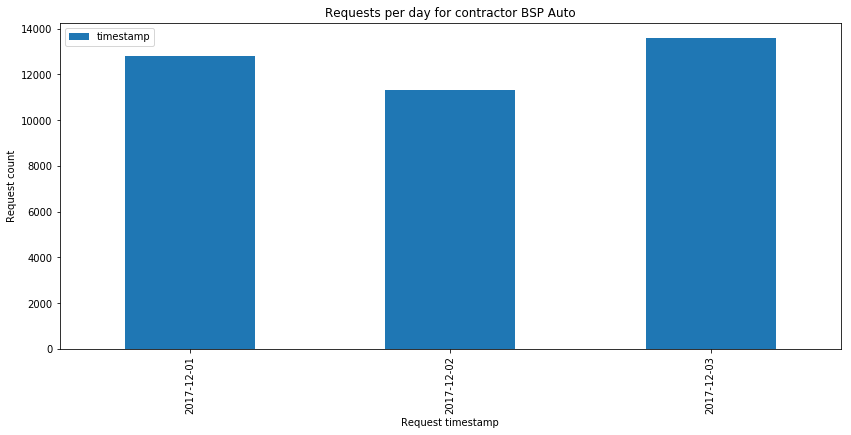

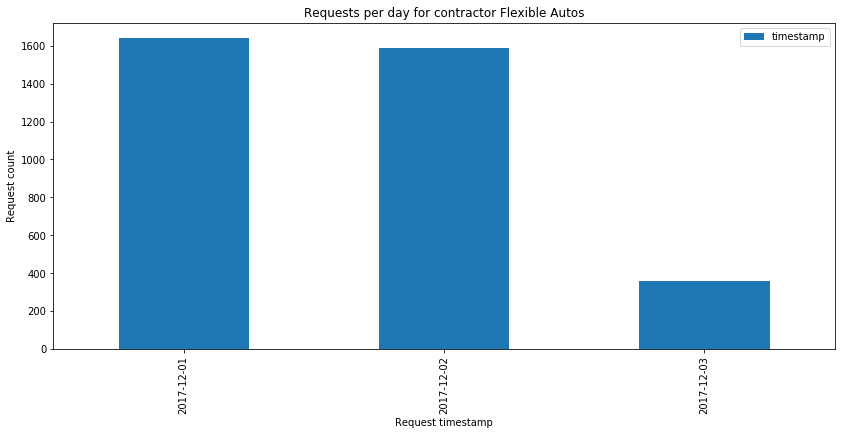

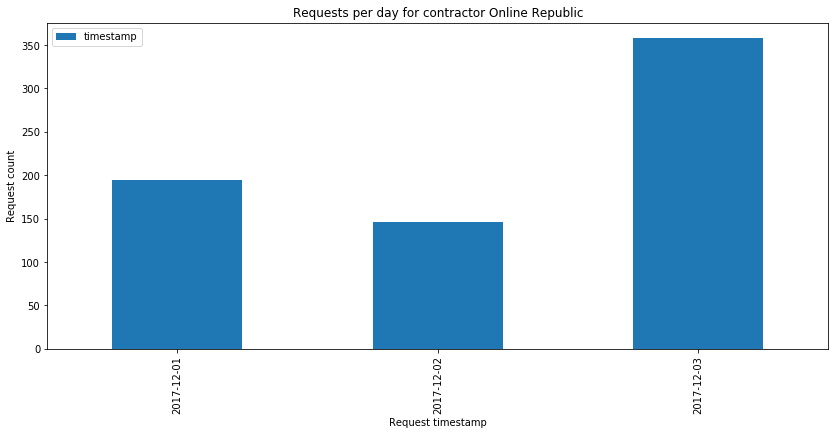

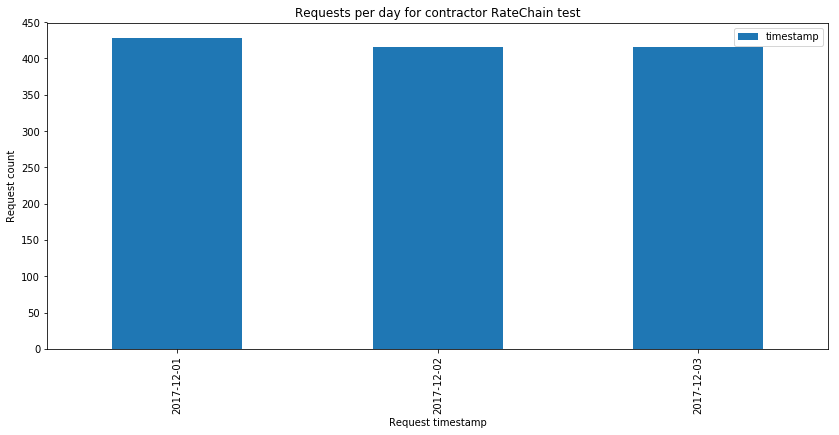

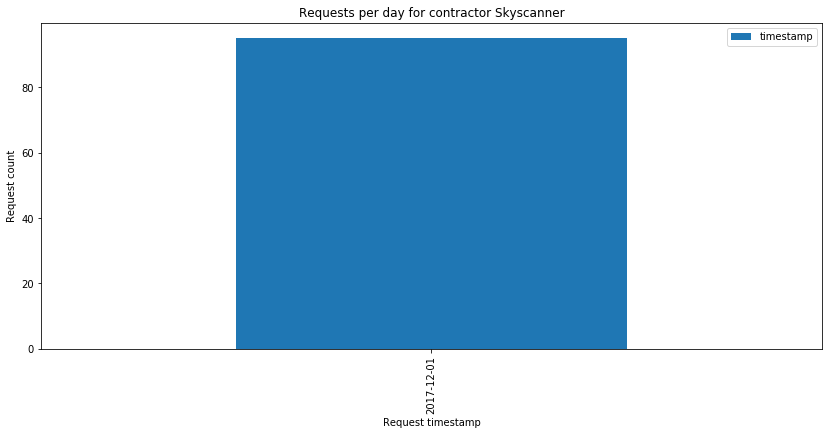

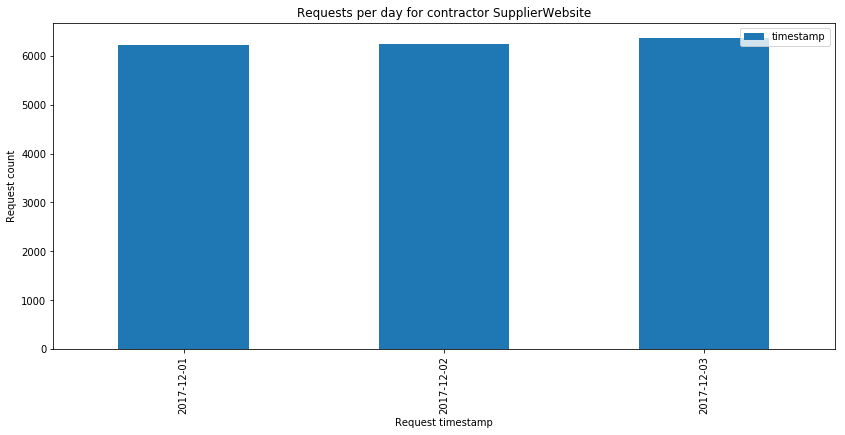

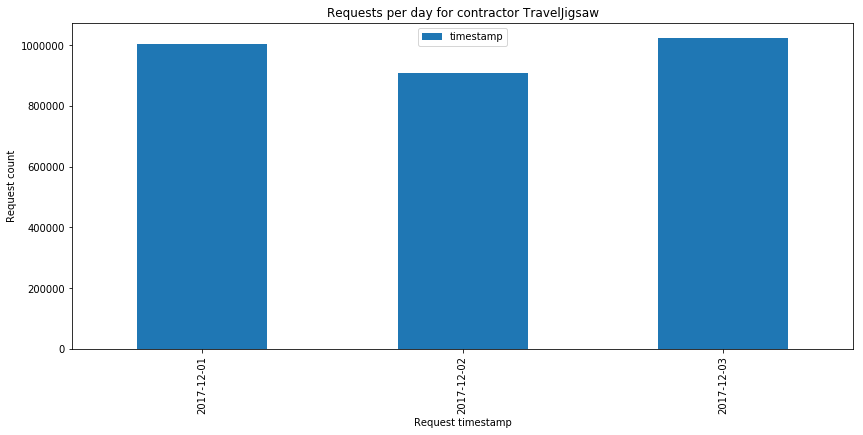

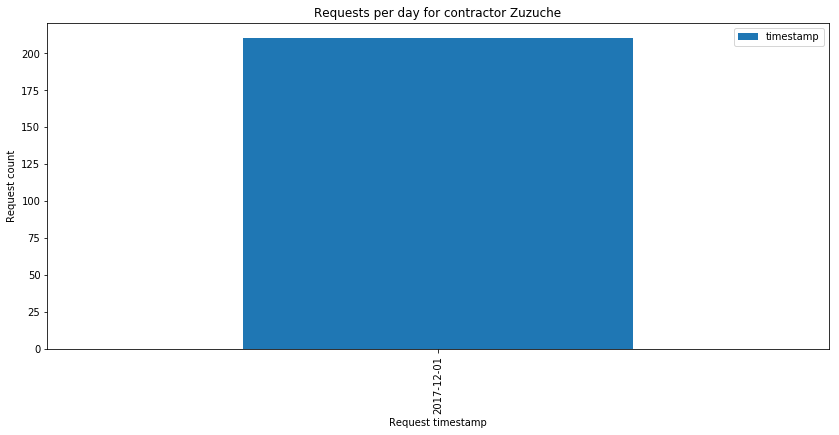

In [9]:

contractors = []
for group in requests_per_contract_:
   # print(group[1])
    time_contract = pd.DataFrame(group[1]["timestamp"])
    contractors.append((group[0], time_contract.groupby(time_contract["timestamp"].dt.date).count()))
    plt = time_contract.groupby(time_contract["timestamp"].dt.date).count().plot(
        kind="bar", title="Requests per day for contractor " + str(group[0])
    )
    plt.set_ylabel("Request count")
    plt.set_xlabel("Request timestamp")

In [163]:
contractors

[('BSP Auto',             timestamp
  timestamp            
  2017-12-01      12786
  2017-12-02      11335
  2017-12-03      13581), ('Flexible Autos',             timestamp
  timestamp            
  2017-12-01       1640
  2017-12-02       1586
  2017-12-03        360), ('Online Republic',             timestamp
  timestamp            
  2017-12-01        194
  2017-12-02        146
  2017-12-03        358), ('RateChain test',             timestamp
  timestamp            
  2017-12-01        428
  2017-12-02        416
  2017-12-03        416), ('Skyscanner',             timestamp
  timestamp            
  2017-12-01         95), ('SupplierWebsite',             timestamp
  timestamp            
  2017-12-01       6224
  2017-12-02       6246
  2017-12-03       6364), ('TravelJigsaw',             timestamp
  timestamp            
  2017-12-01    1004378
  2017-12-02     908176
  2017-12-03    1022647), ('Zuzuche',             timestamp
  timestamp            
  2017-12-01        210)]

In [10]:
l = []
for con in contractors:
    for row in con[1].itertuples():
        l.append([con[0], row[0], row[1]])

        
df_contractor_dreq = pd.DataFrame(l)
df_contractor_dreq.columns = ["contractor", "date", "count"]
#df_contractor_dreq.reset_index().set_index("contractor")
print(df_contractor_dreq)
#df_contractor_dreq = df_contractor_dreq.pivot(index='contractor', columns='date', values='count')

#import seaborn as sns

         contractor        date    count
0          BSP Auto  2017-12-01    12786
1          BSP Auto  2017-12-02    11335
2          BSP Auto  2017-12-03    13581
3    Flexible Autos  2017-12-01     1640
4    Flexible Autos  2017-12-02     1586
5    Flexible Autos  2017-12-03      360
6   Online Republic  2017-12-01      194
7   Online Republic  2017-12-02      146
8   Online Republic  2017-12-03      358
9    RateChain test  2017-12-01      428
10   RateChain test  2017-12-02      416
11   RateChain test  2017-12-03      416
12       Skyscanner  2017-12-01       95
13  SupplierWebsite  2017-12-01     6224
14  SupplierWebsite  2017-12-02     6246
15  SupplierWebsite  2017-12-03     6364
16     TravelJigsaw  2017-12-01  1004378
17     TravelJigsaw  2017-12-02   908176
18     TravelJigsaw  2017-12-03  1022647
19          Zuzuche  2017-12-01      210


(1, 10000000.0)

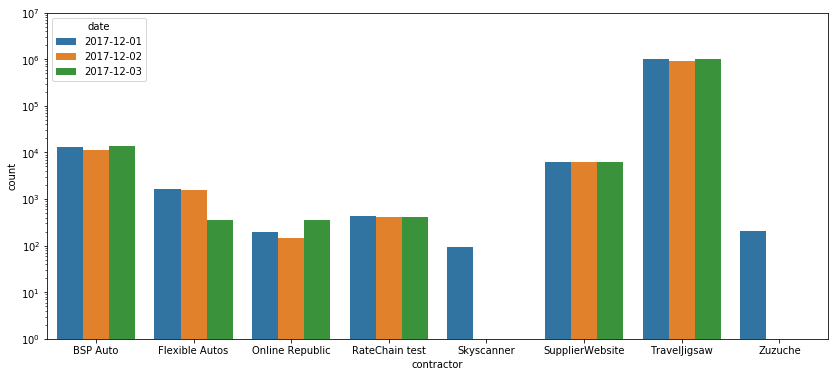

In [15]:
#import importlib
#importlib.reload(seaborn)
import seaborn as sns
import matplotlib.pyplot as plt
plt.ylim(10, 40)

sns.barplot(x='contractor', y='count', hue='date', data=df_contractor_dreq, log=True)
plt.ylim(1, 10e6)

## For each day, when are requested pickup dates

TODO: Make a different plot on how many days ahead the request was made...

In [271]:
# group data by day
daylist = []
days = []
for group in df.groupby(df["timestamp"].dt.date):
    days.append(group[0])
    daylist.append(group[1])


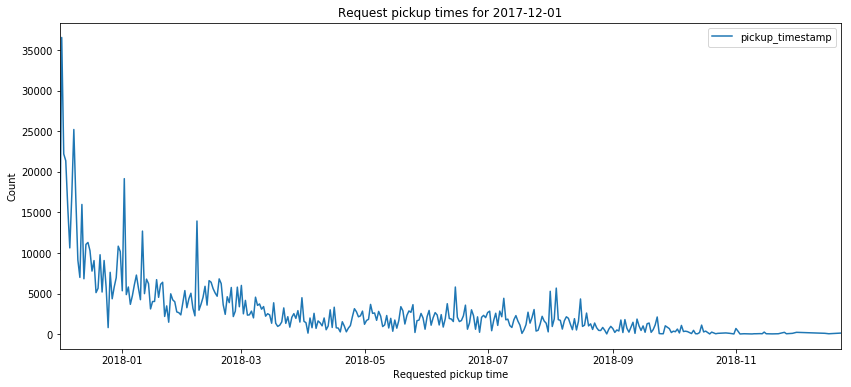

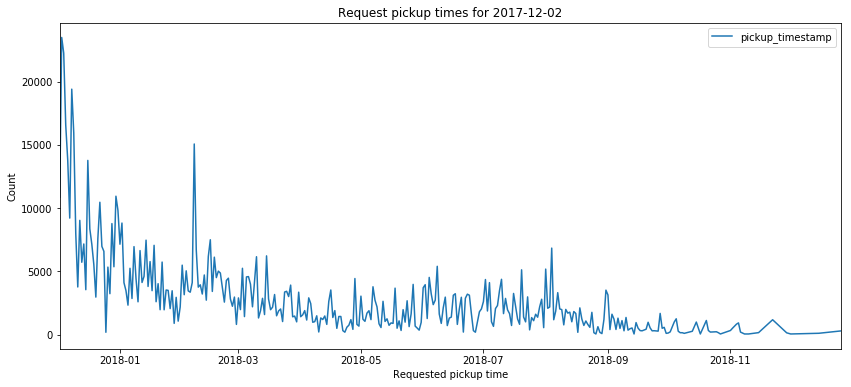

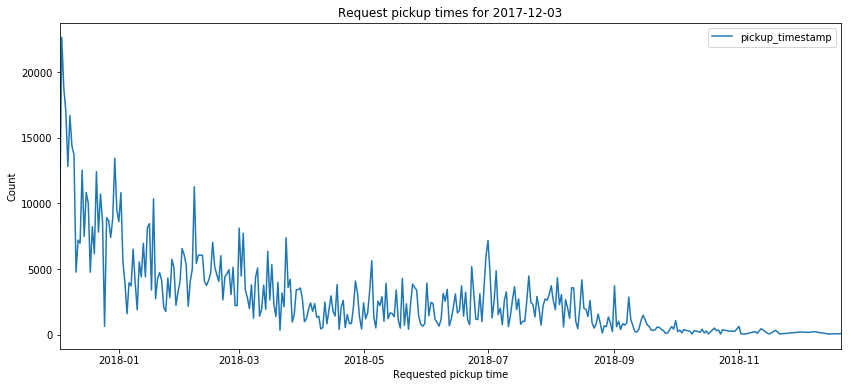

In [137]:
for i, day in enumerate(daylist):
    day_pickup = pd.DataFrame(day["pickup_timestamp"])
    plt = day_pickup.groupby(day_pickup["pickup_timestamp"].dt.date).count().plot(
        kind="line", title="Request pickup times for " + str(days[i]))
    plt.set_ylabel("Count")
    plt.set_xlabel("Requested pickup time")

## Number of requests in time

### For all days

Text(0,0.5,'Number of requests')

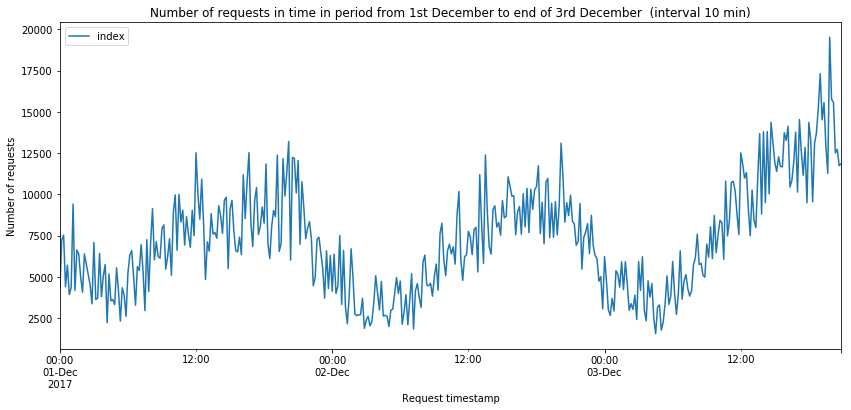

In [140]:
requests = df_requests.reset_index().set_index("timestamp")
resampled_requests_plot = requests.resample("10Min").count().plot(kind="line", title="Number of requests in time in period from 1st December to end of 3rd December  (interval 10 min)")
resampled_requests_plot.set_xlabel("Request timestamp")
resampled_requests_plot.set_ylabel("Number of requests")



Text(0,0.5,'Number of requests')

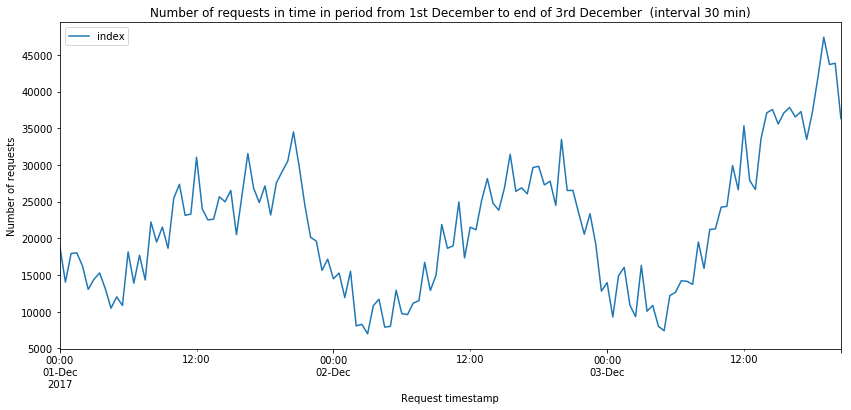

In [145]:
resampled_requests_plot = requests.resample("30Min").count().plot(kind="line", title="Number of requests in time in period from 1st December to end of 3rd December  (interval 30 min)")
resampled_requests_plot.set_xlabel("Request timestamp")
resampled_requests_plot.set_ylabel("Number of requests")



### For each day seperately



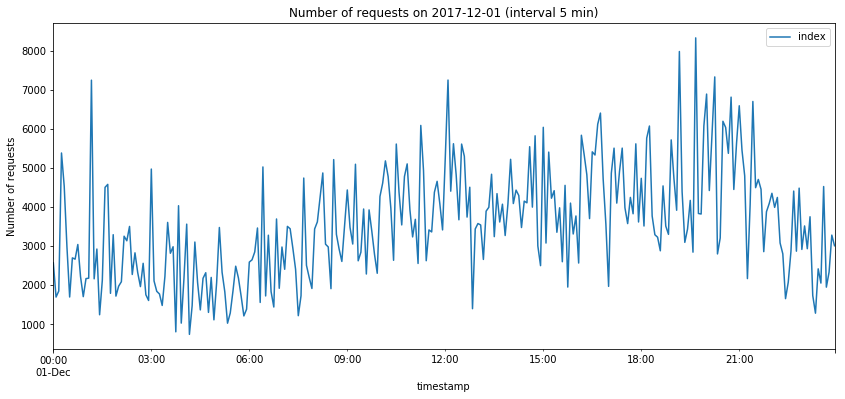

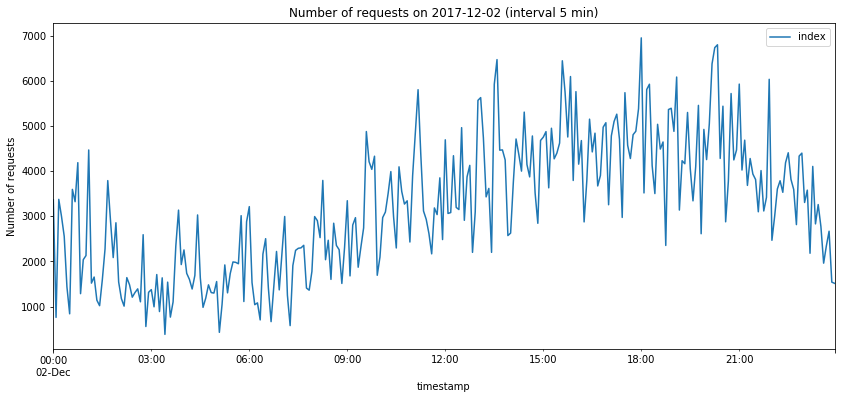

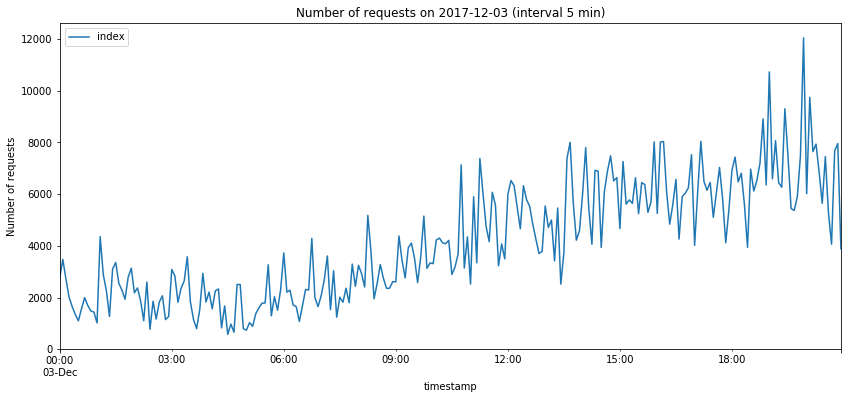

In [147]:
for i, day in enumerate(daylist):
    reqs = pd.DataFrame(day["timestamp"]).reset_index().set_index("timestamp")
    req_plt = reqs.resample("5Min").count().plot(kind="line", title="Number of requests on " + str(days[i]) + " (interval 5 min)")
    req_plt.set_ylabel("Number of requests")

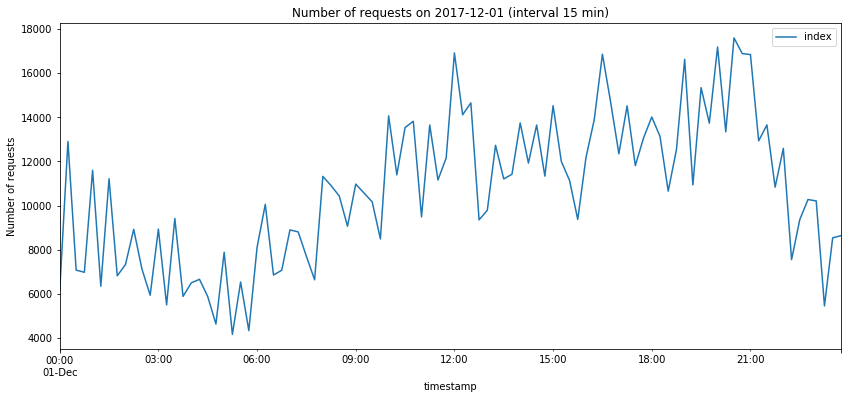

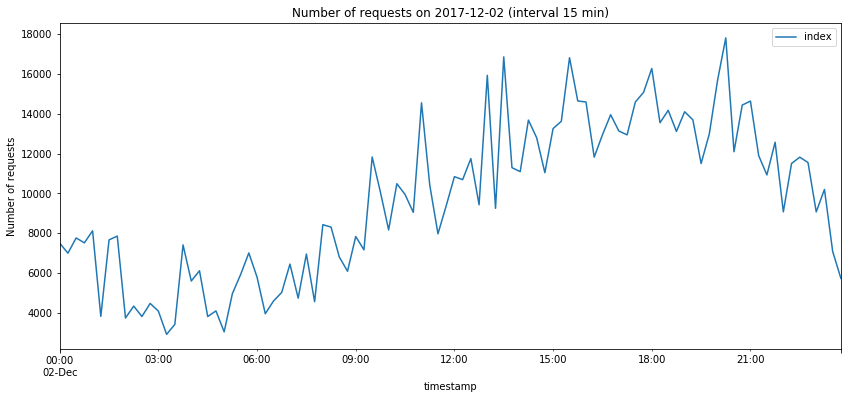

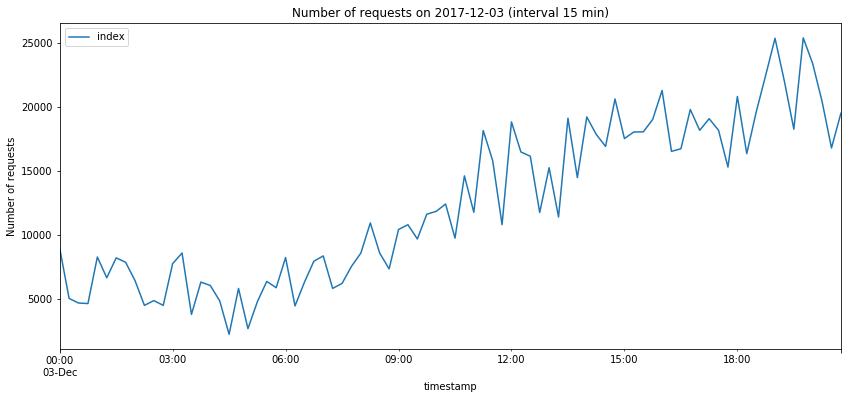

In [149]:
for i, day in enumerate(daylist):
    reqs = pd.DataFrame(day["timestamp"]).reset_index().set_index("timestamp")
    req_plt = reqs.resample("15Min").count().plot(kind="line", title="Number of requests on " + str(days[i]) + " (interval 15 min)")
    req_plt.set_ylabel("Number of requests")

## Finding hot dates (most popular days)
For each request we have pickup date and return date.
Lets assume we have a request with pickup_date 27.11.2017 and return date 31.11.2017, then such request will add one value to each following day 27,28,29,30,31 (every day inbetween and including 27 and 31).

With this we can get some insight to which dates would have probably the largest number of active reservations

In [150]:
from collections import defaultdict

In [272]:
# For each day find most hot dates (which are most frequently in an interval). TODO: implement faster solution.

iteration_count = 0
day_counts = []
for day in daylist:
    counts = defaultdict(int)
    for row in day.itertuples():
        for date in pd.date_range(row[2], row[3], normalize=True): # Normalize - to midnight.
            counts[date] += 1
        iteration_count += 1
    day_counts.append(counts)
        

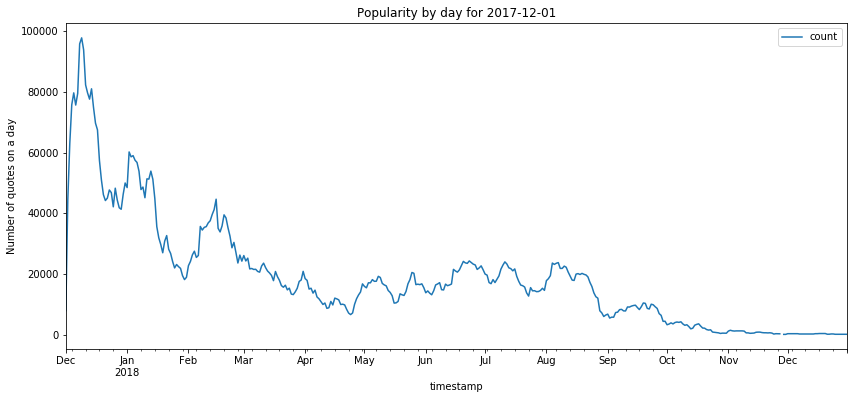

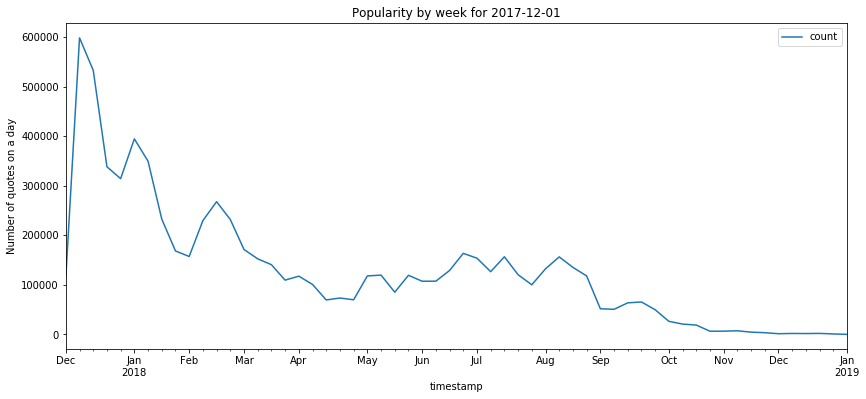

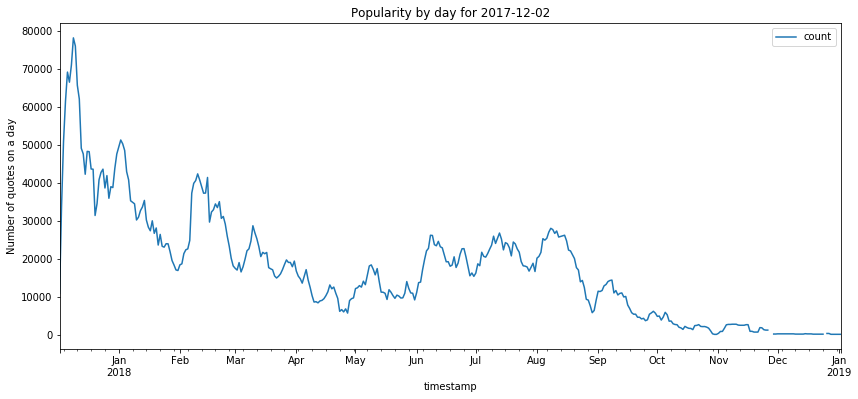

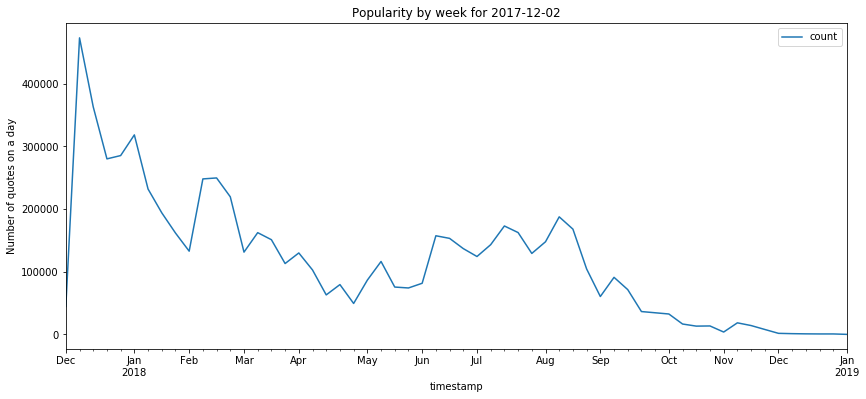

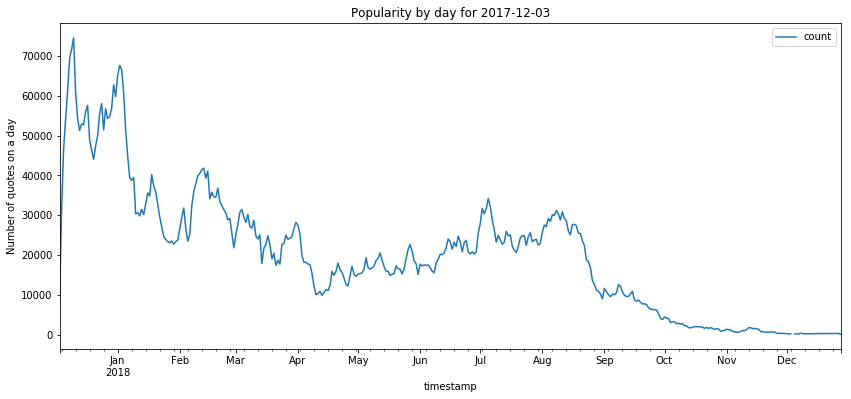

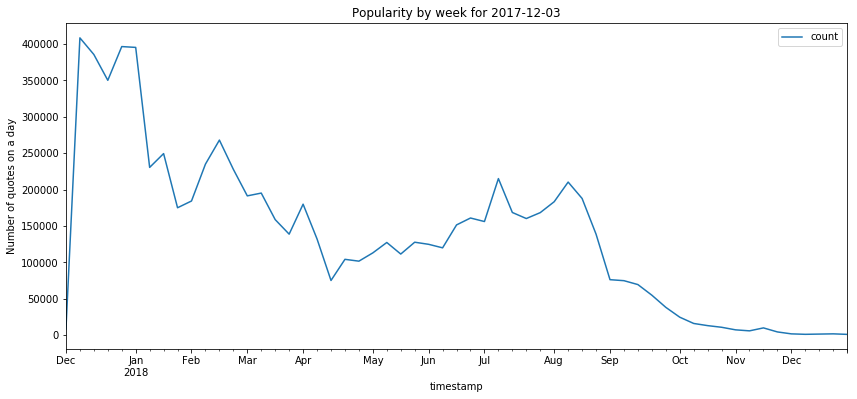

In [273]:
for i in range(3):
    time_series_1 = pd.DataFrame(pd.Series(day_counts[i]))
    time_series_1.index.name = "timestamp"
    time_series_1.columns = ["count"] 
    df1=time_series_1.groupby(pd.Grouper(freq="D")).sum().plot(kind="line", title="Popularity by day for " + str(days[i]))
    df1.set_ylabel("Number of quotes on a day")
    df2 = time_series_1.groupby(pd.Grouper(freq="W")).sum().plot(kind="line", title="Popularity by week for " + str(days[i]))
    df2.set_ylabel("Number of quotes on a day")

### Combined hottest day

In [72]:
counts = defaultdict(int)
for row in df.itertuples():
    for date in pd.date_range(row[2], row[3], normalize=True): # Normalize - to midnight.
        counts[date] += 1
        

Text(0,0.5,'Number of reservations on a day')

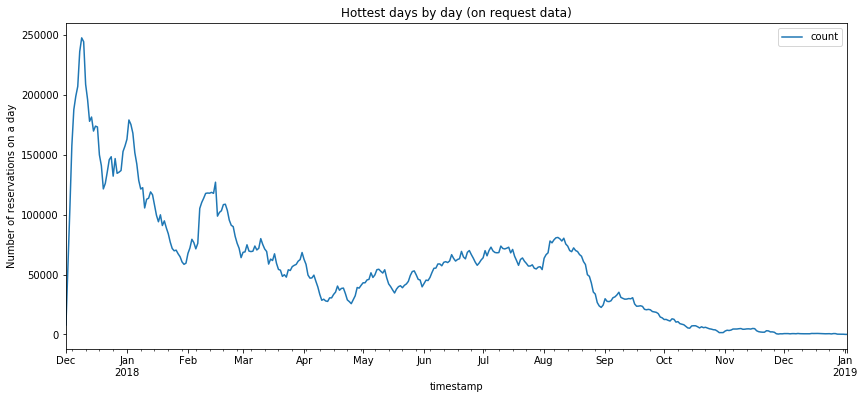

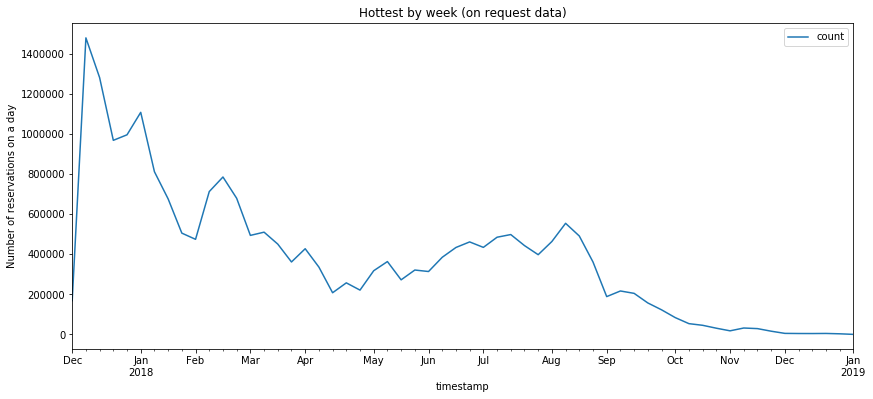

In [269]:
time_series_1 = pd.DataFrame(pd.Series(counts))
time_series_1.index.name = "timestamp"
time_series_1.columns = ["count"] 
df1=time_series_1.groupby(pd.TimeGrouper("D")).sum().plot(kind="line", title="Hottest days by day (on request data)")
df1.set_ylabel("Number of reservations on a day")
df2 = time_series_1.groupby(pd.TimeGrouper("W")).sum().plot(kind="line", title="Hottest by week (on request data)")
df2.set_ylabel("Number of reservations on a day")

## Sort in n*log(n), by pickup_date
https://www.geeksforgeeks.org/find-the-point-where-maximum-intervals-overlap/



In [43]:

# sort pickup and returns
# TODO: Implement this, will be quick.
pickup_sort = df["pickup_timestamp"].dt.normalize().sort_values().reset_index(drop=True)
return_sort = df["return_timestamp"].dt.normalize().sort_values().reset_index(drop=True)


In [48]:
start = pickup_sort[0]
end = return_sort[len(df)-1]


2017-12-01 00:00:00


In [75]:
pickup_ind = 0
return_ind = 0

opened_bracket_count = 0

counts_new = {}

length = len(df)

# For every date between first pickup_rate and last return_date find how many open reservations would be based on price requests.
# I wonder if date comparison is slow, it could probably be faster....
for date in pd.date_range(start, end, normalize=True):
    while opened_bracket_count >= 1 and return_sort[return_ind] < date:
        opened_bracket_count -= 1
        return_ind += 1
    while pickup_ind < length and pickup_sort[pickup_ind] <= date:
        opened_bracket_count += 1
        pickup_ind += 1
    counts_new[date] = opened_bracket_count



### Finished algorithm.

In [77]:
def count_active_on_day(df):
    # Algorithm to find how many requests are made for a certain day. 
    # Accepts a dataframe with pickup dates and return dates (columns pickup_timestamp and return_timestamp)
    # Effective version based on this: https://www.geeksforgeeks.org/find-the-point-where-maximum-intervals-overlap/
    # Returns a dictionary with key being date and values being how many requests for that date. 

    pickup_sort = df["pickup_timestamp"].dt.normalize().sort_values().reset_index(drop=True)
    return_sort = df["return_timestamp"].dt.normalize().sort_values().reset_index(drop=True)
    
    start = pickup_sort[0]
    end = return_sort[len(df)-1]

    pickup_ind = 0
    return_ind = 0

    opened_bracket_count = 0

    counts_new = {}

    length = len(df)

    # For every date between first pickup_rate and last return_date find how many open reservations would be based on price requests.
    # I wonder if date comparison is slow, it could probably be faster....
    for date in pd.date_range(start, end, normalize=True):
        while opened_bracket_count >= 1 and return_sort[return_ind] < date:
            opened_bracket_count -= 1
            return_ind += 1
        while pickup_ind < length and pickup_sort[pickup_ind] <= date:
            opened_bracket_count += 1
            pickup_ind += 1
        counts_new[date] = opened_bracket_count

    return counts_new

### Display hot dates for each broker



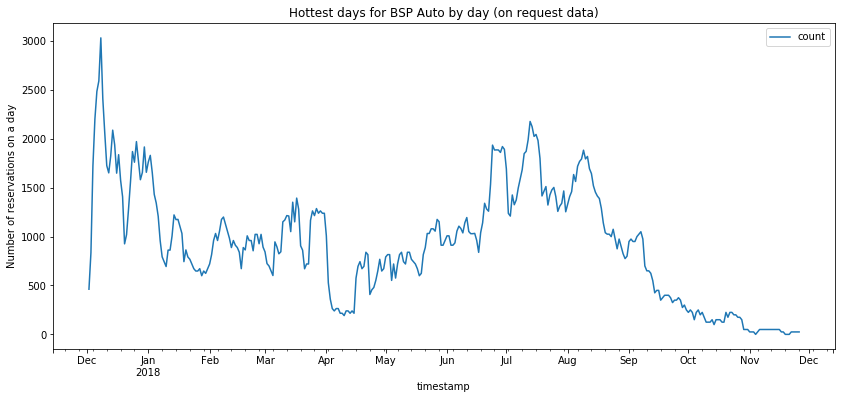

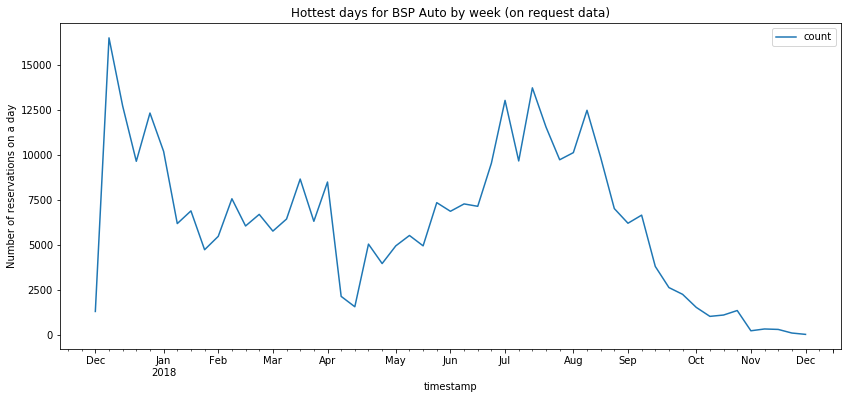

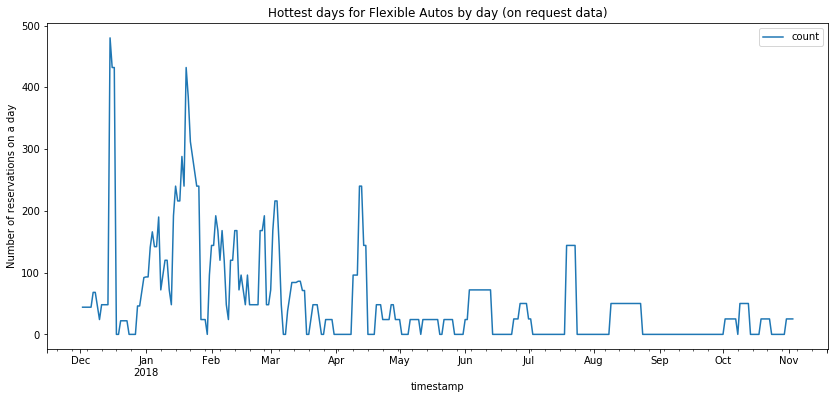

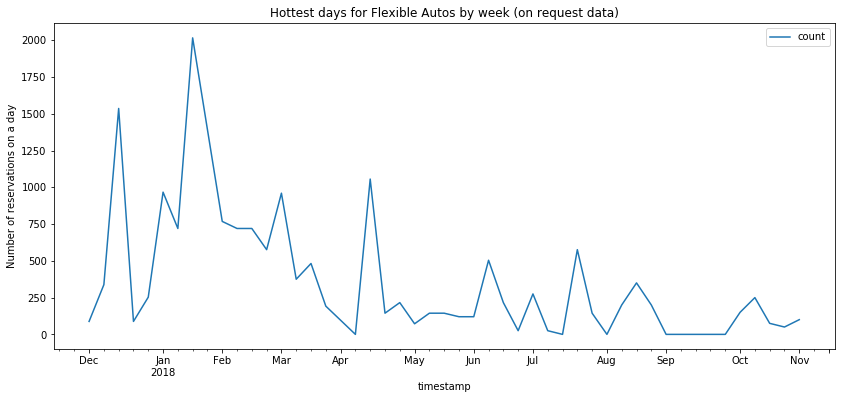

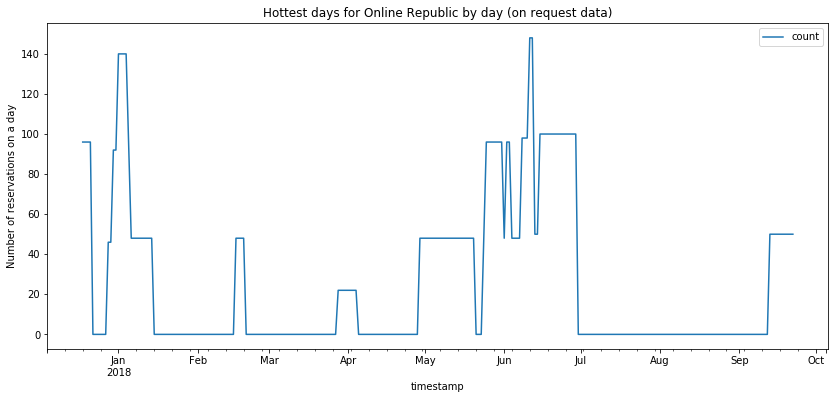

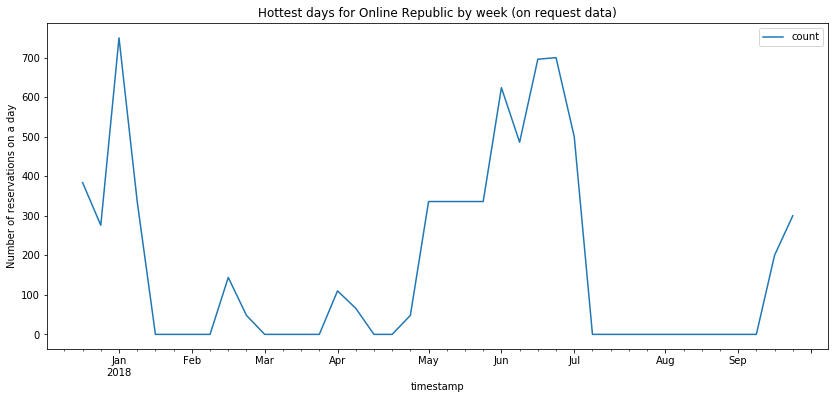

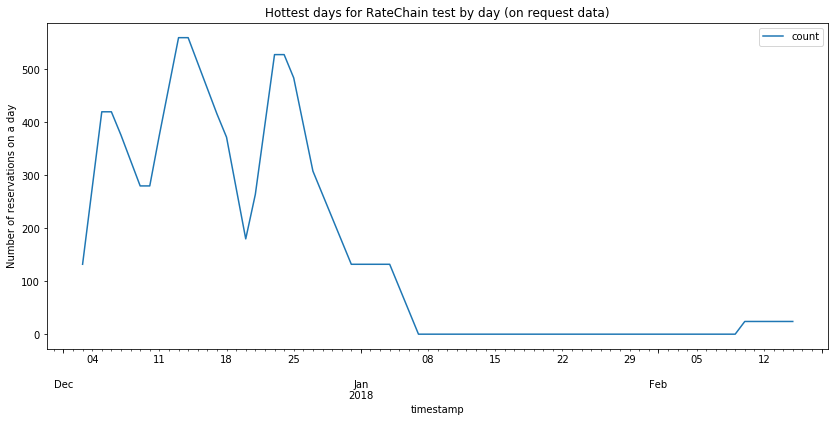

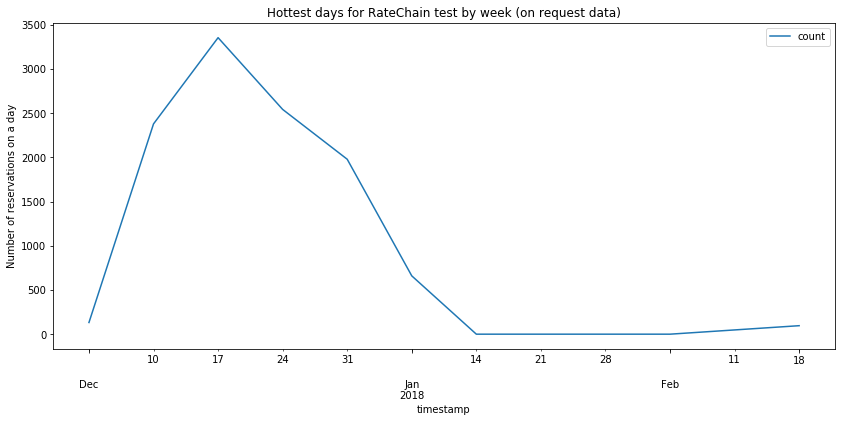

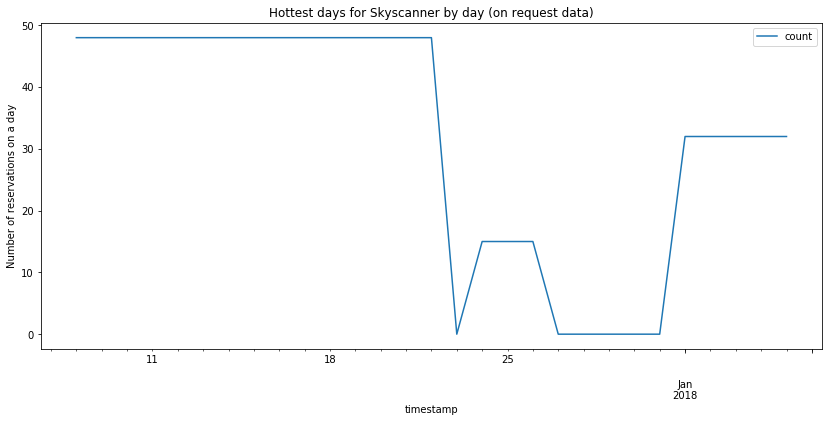

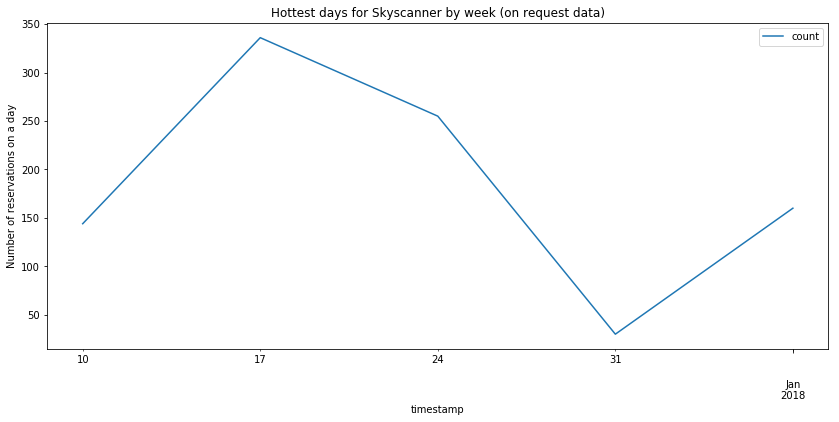

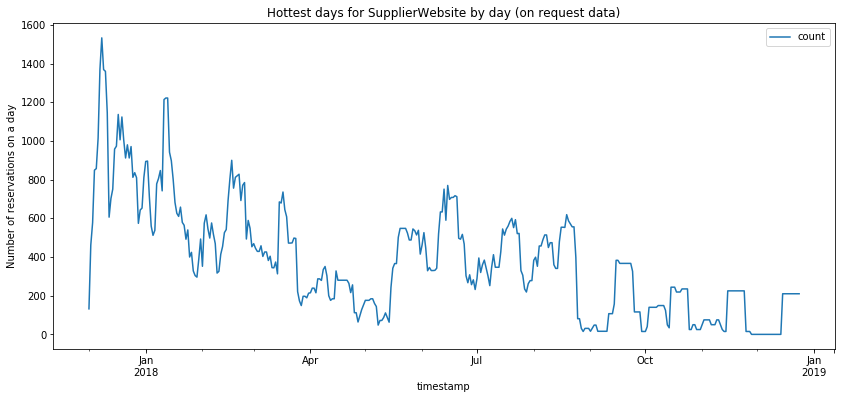

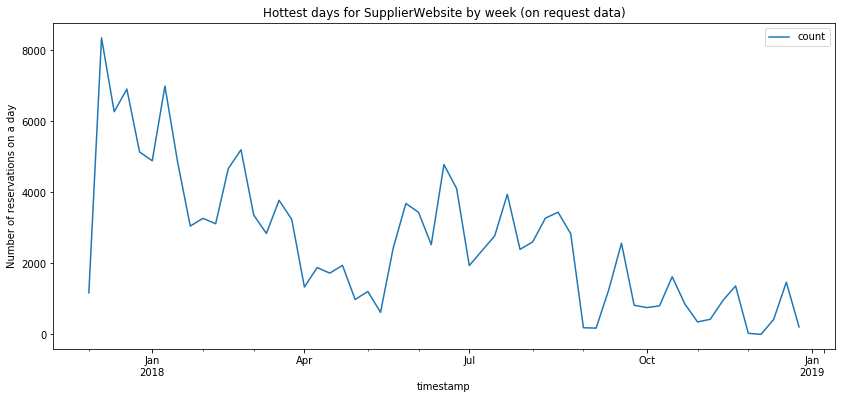

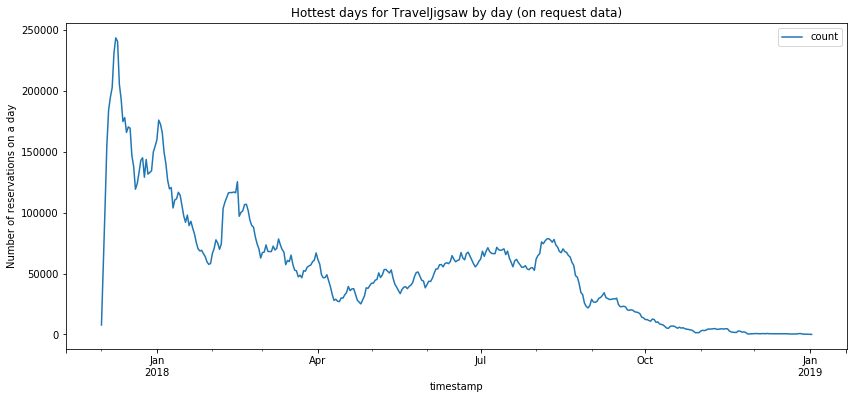

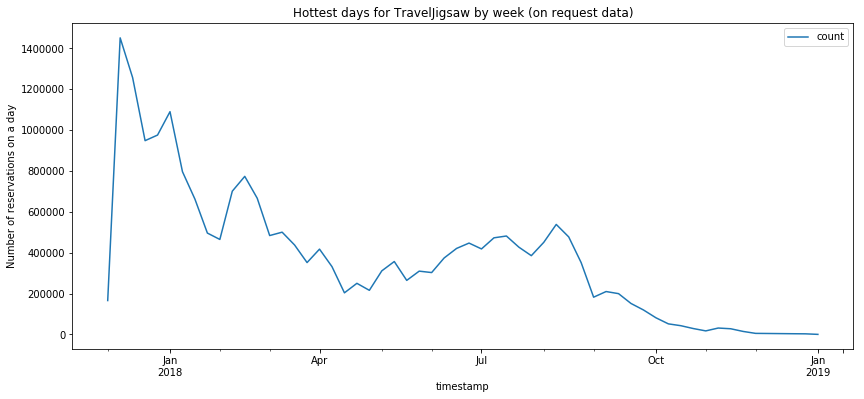

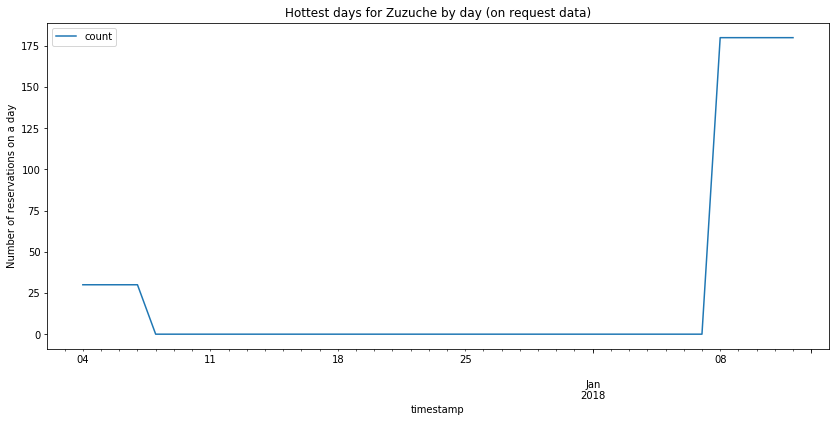

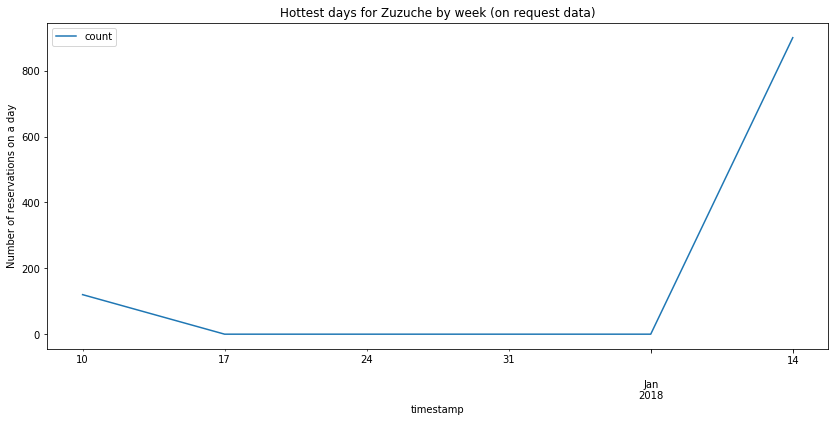

In [94]:
# For each contractor find hot dates.

pickups_per_broker = merged_requests[["pickup_timestamp", "return_timestamp", "Broker_name"]]

broker_dict = {}
for group in pickups_per_broker.groupby(pickups_per_broker["Broker_name"]):
    broker_dict[group[0]] = count_active_on_day(group[1])


for k,v in broker_dict.items():
    time_series_1 = pd.DataFrame(pd.Series(v))
    time_series_1.index.name = "timestamp"
    time_series_1.columns = ["count"] 
    df1=time_series_1.groupby(pd.Grouper(freq="D")).sum().plot(kind="line", title="Hottest days for "+ k +" by day (on request data)")
    df1.set_ylabel("Number of reservations on a day")
    df2 = time_series_1.groupby(pd.Grouper(freq="W")).sum().plot(kind="line", title="Hottest days for " + k + " by week (on request data)")
    df2.set_ylabel("Number of reservations on a day")
    
    

## Data transformations on rate_quote.csv

In [68]:
# Load in huge file by chunks, pick 3 columns and append to another file..

filename = "rate_quote.csv"
outputfile = "trimmed_rate_quote.csv"

fields = ["timestamp", "pickup_timestamp", "return_timestamp"]

chunksize = 300000

first_save = True

of = open(outputfile, "a")
for chunk in pd.read_csv(filename, chunksize=chunksize, skipinitialspace=True, usecols=fields):
    chunk.to_csv(of)

of.close()


# Reservation data analysis

Currently not caring about duplicate, cancelled or not-finished reservations.

In [238]:
fields = ["rate_request_timestamp", "reservation_request_timestamp", "pickup_timestamp", "return_timestamp"]
df = pd.read_csv("reservations.csv", skipinitialspace=True, usecols=fields)
print(df.shape)

df["rate_request_timestamp"] = pd.to_datetime(df['rate_request_timestamp'])
df["reservation_request_timestamp"] = pd.to_datetime(df['reservation_request_timestamp'])
df["pickup_timestamp"] = pd.to_datetime(df['pickup_timestamp'])
df["return_timestamp"] = pd.to_datetime(df['return_timestamp'])
print(df.dtypes)



(9747, 4)
pickup_timestamp                 datetime64[ns]
return_timestamp                 datetime64[ns]
rate_request_timestamp           datetime64[ns]
reservation_request_timestamp    datetime64[ns]
dtype: object


In [239]:
df_reservation_requests = df["reservation_request_timestamp"]

## Number of reservations made on date

Text(0,0.5,'Number of requests')

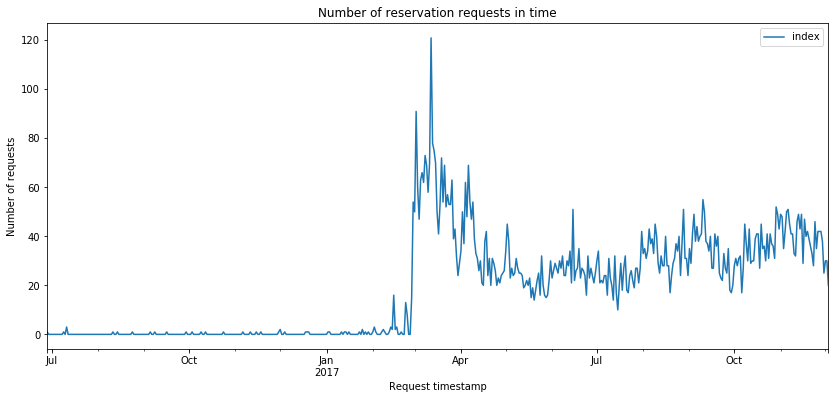

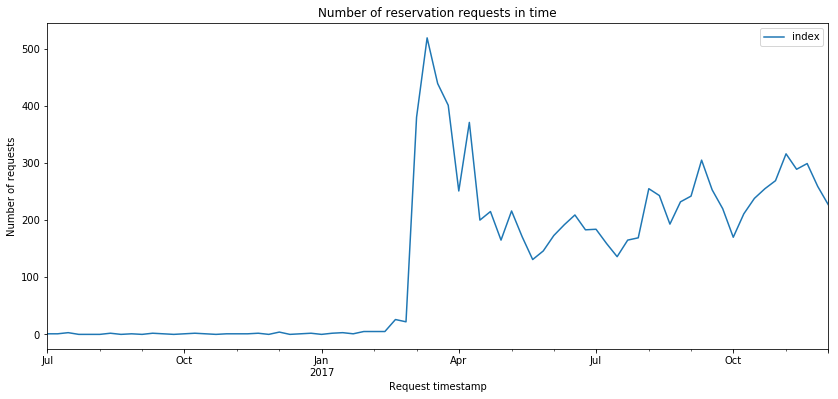

In [243]:
reservation_requests = df_reservation_requests.reset_index().set_index("reservation_request_timestamp")
resampled_requests_plot = reservation_requests.resample("1D").count().plot(kind="line", title="Number of reservation requests in time")
resampled_requests_plot.set_xlabel("Request timestamp")
resampled_requests_plot.set_ylabel("Number of requests")

resampled_requests_plot_week = reservation_requests.resample("1W").count().plot(kind="line", title="Number of reservation requests in time")
resampled_requests_plot_week.set_xlabel("Request timestamp")
resampled_requests_plot_week.set_ylabel("Number of requests")



## When are pickup times


Text(0,0.5,'Number of requests')

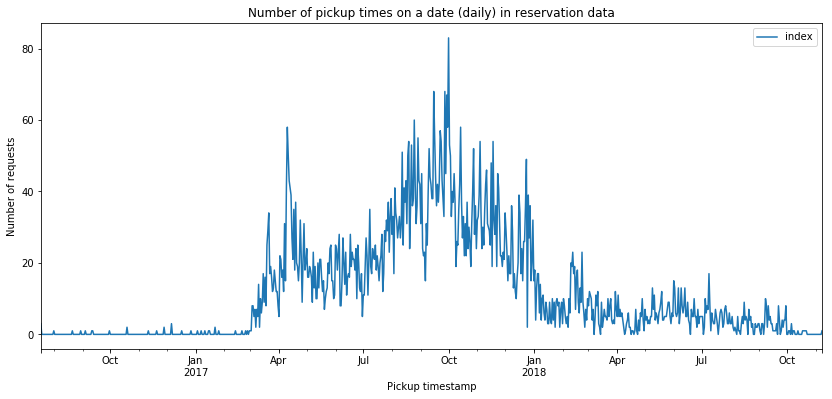

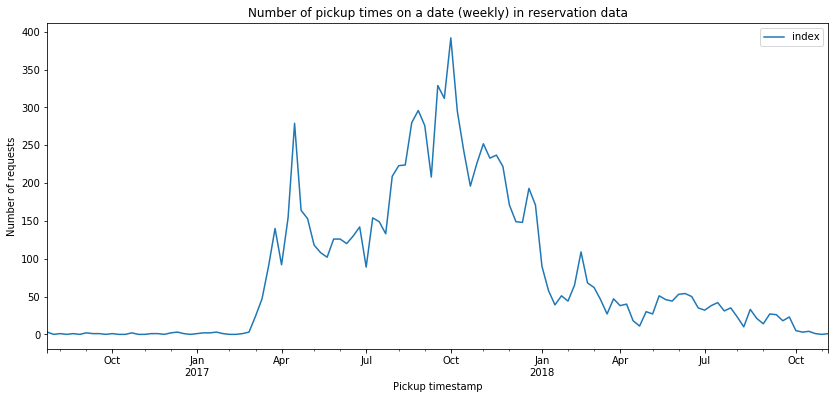

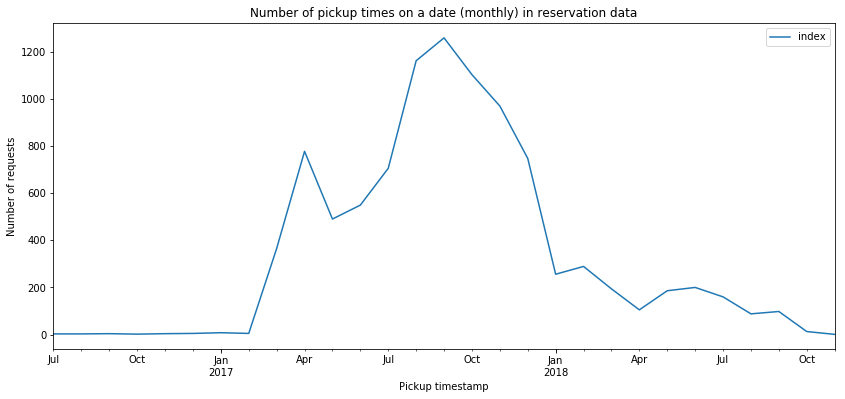

In [247]:
df_pickup_times = df["pickup_timestamp"]
pickup_times = df_pickup_times.reset_index().set_index("pickup_timestamp")
resampled_requests_plot = pickup_times.resample("1D").count().plot(kind="line", title="Number of pickup times on a date (daily) in reservation data")
resampled_requests_plot.set_xlabel("Pickup timestamp")
resampled_requests_plot.set_ylabel("Number of requests")

resampled_requests_plot_week = pickup_times.resample("1W").count().plot(kind="line", title="Number of pickup times on a date (weekly) in reservation data")
resampled_requests_plot_week.set_xlabel("Pickup timestamp")
resampled_requests_plot_week.set_ylabel("Number of requests")


resampled_requests_plot_month = pickup_times.resample("1M").count().plot(kind="line", title="Number of pickup times on a date (monthly) in reservation data")
resampled_requests_plot_month.set_xlabel("Pickup timestamp")
resampled_requests_plot_month.set_ylabel("Number of requests")



## Finding hot dates (number of active reservations on a day)

The same as in price quote data. TODO: This also has to be replaced with more effective code.


In [259]:
# Find date most hot days (which are most frequently in an interval). TODO: implement faster solution.

iteration_count = 0
counts = defaultdict(int)
for row in df.itertuples():
    for date in pd.date_range(row[1], row[2], normalize=True):
        counts[date] += 1
        
#print(day_counts)

Text(0,0.5,'Number of reservations on a day')

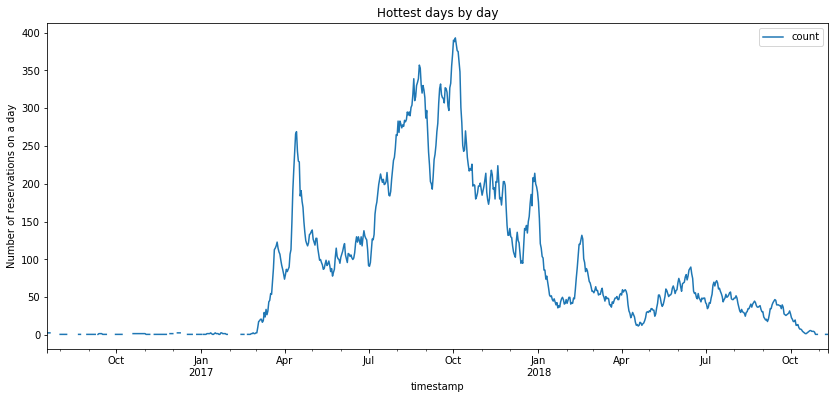

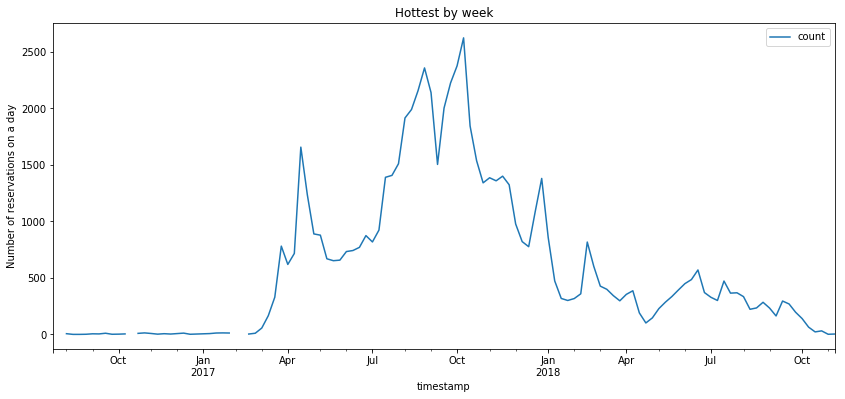

In [264]:
time_series_1 = pd.DataFrame(pd.Series(counts))
time_series_1.index.name = "timestamp"
time_series_1.columns = ["count"] 
df1=time_series_1.groupby(pd.Grouper(freq="D")).sum().plot(kind="line", title="Hottest days by day")
df1.set_ylabel("Number of reservations on a day")
df2 = time_series_1.groupby(pd.Grouper(freq="W")).sum().plot(kind="line", title="Hottest by week")
df2.set_ylabel("Number of reservations on a day")

### Hot reservations days by broker

In [96]:
fields = ["rate_request_timestamp", "reservation_request_timestamp", "pickup_timestamp", "return_timestamp", "Broker name"]
df_res = pd.read_csv("reservations.csv", skipinitialspace=True, usecols=fields)
print(df_res.shape)

df_res["rate_request_timestamp"] = pd.to_datetime(df_res['rate_request_timestamp'])
df_res["reservation_request_timestamp"] = pd.to_datetime(df_res['reservation_request_timestamp'])
df_res["pickup_timestamp"] = pd.to_datetime(df_res['pickup_timestamp'])
df_res["return_timestamp"] = pd.to_datetime(df_res['return_timestamp'])
print(df_res.dtypes)


(9747, 5)
pickup_timestamp                 datetime64[ns]
return_timestamp                 datetime64[ns]
rate_request_timestamp           datetime64[ns]
reservation_request_timestamp    datetime64[ns]
Broker name                              object
dtype: object


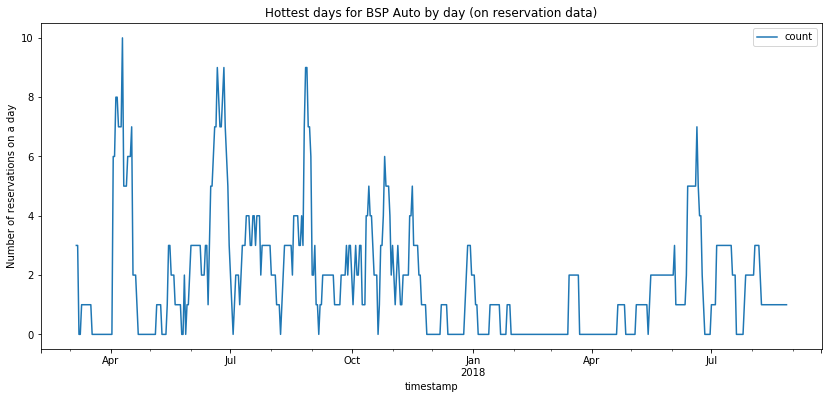

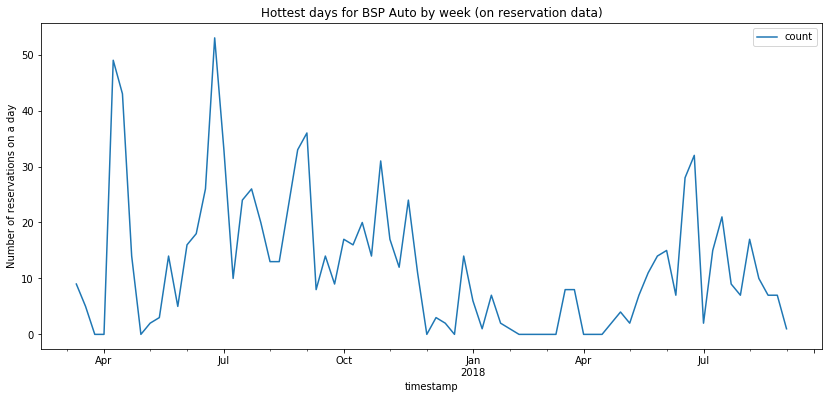

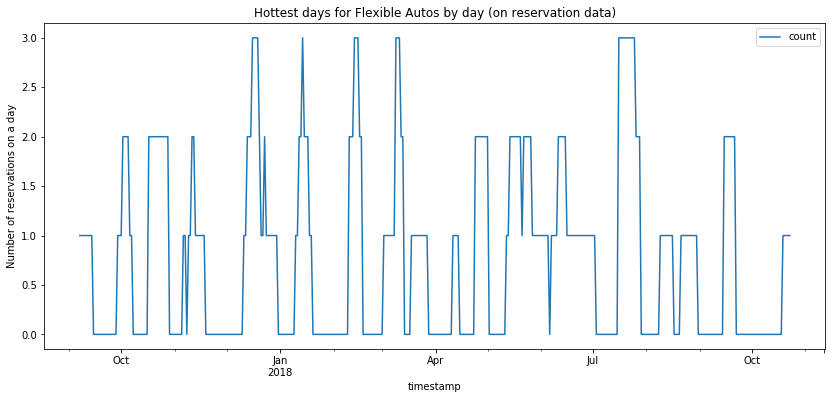

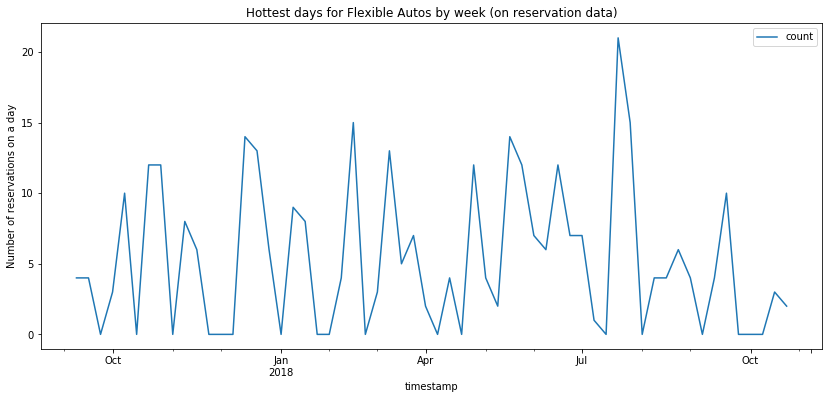

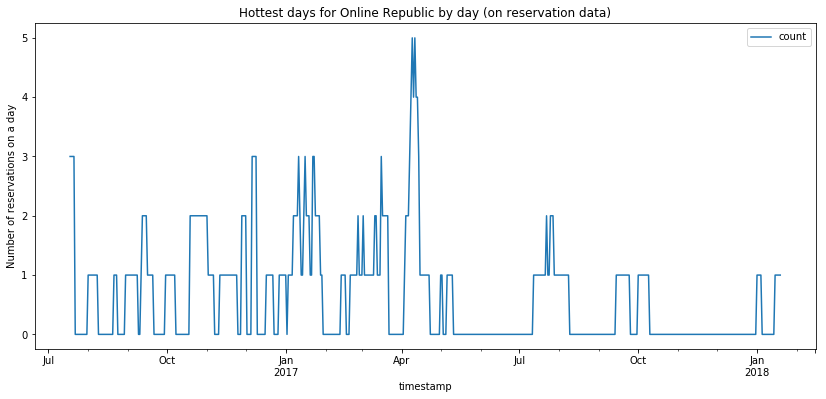

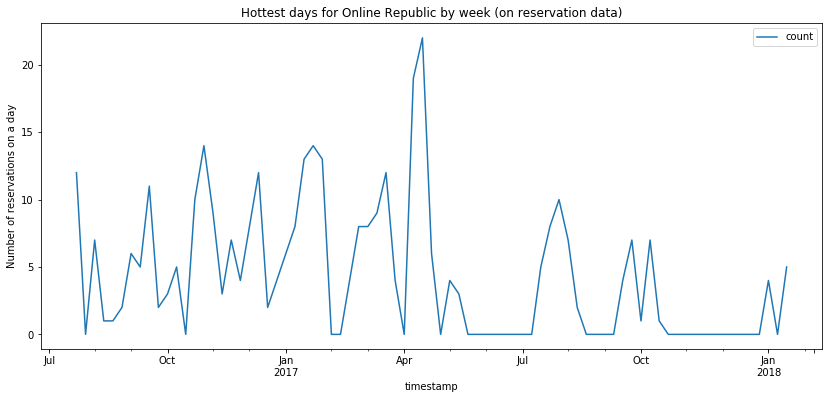

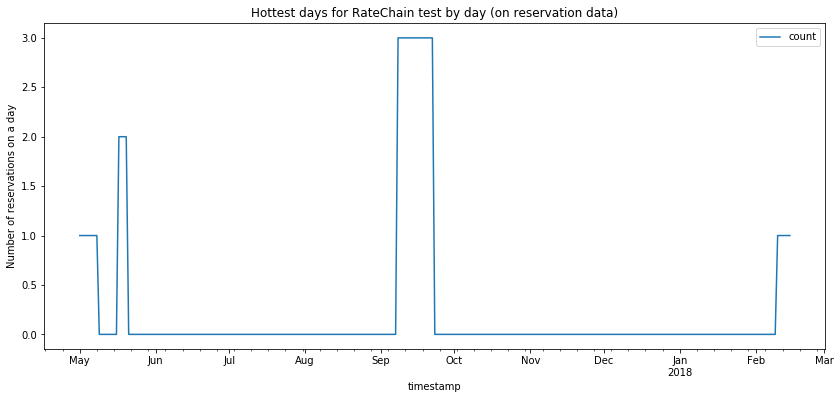

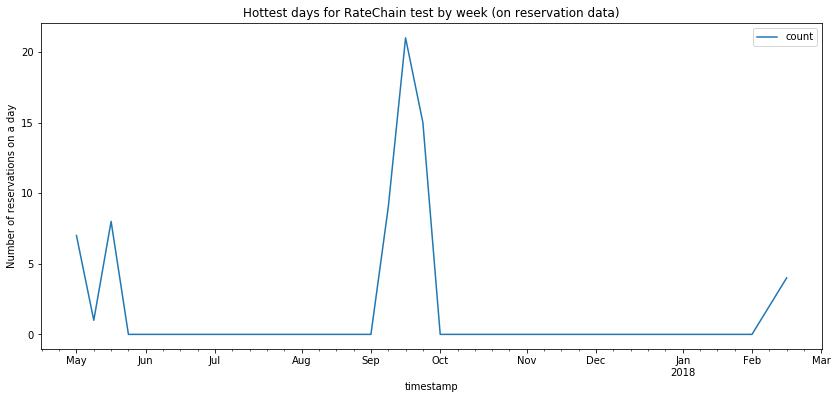

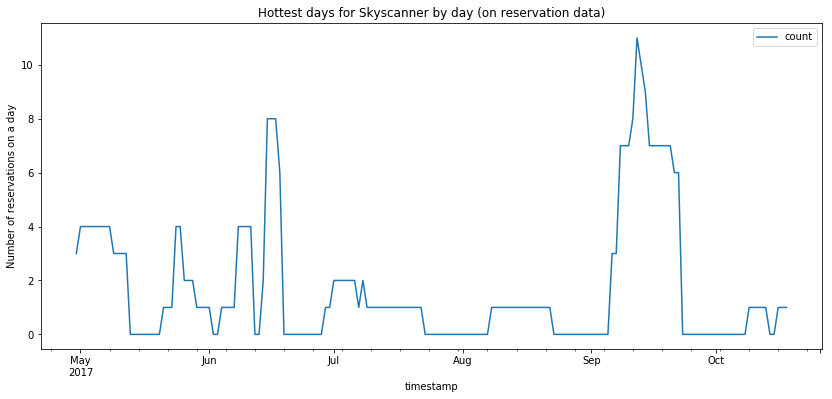

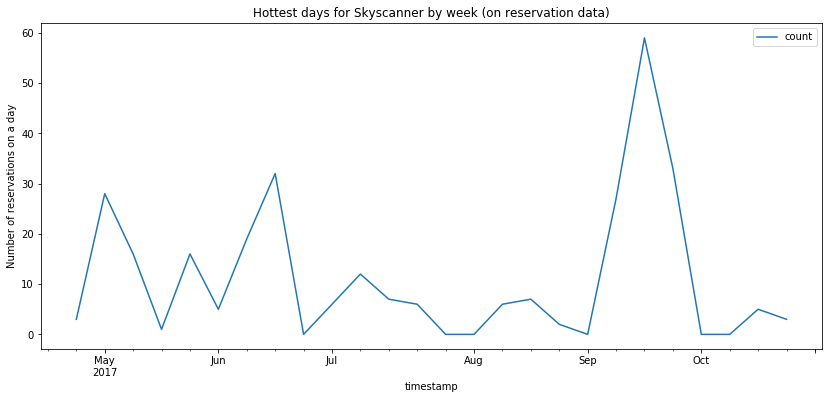

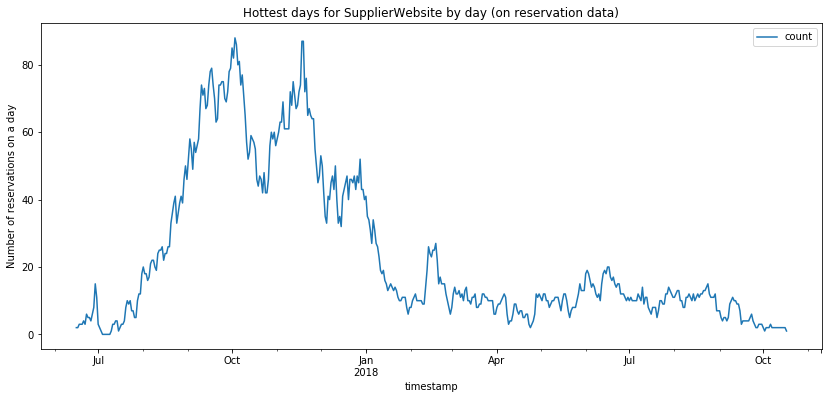

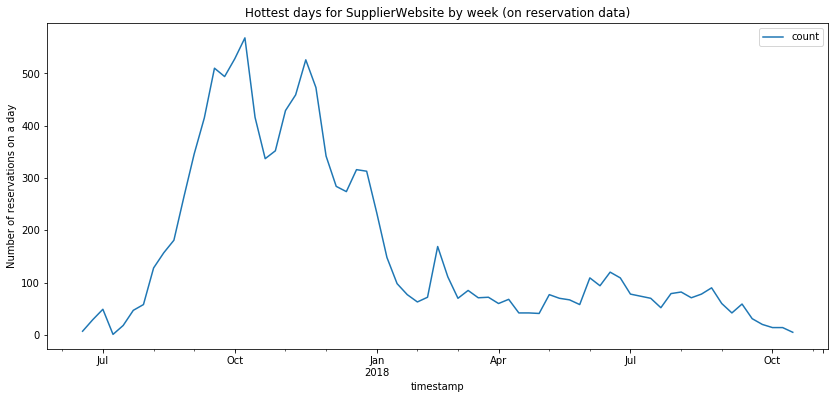

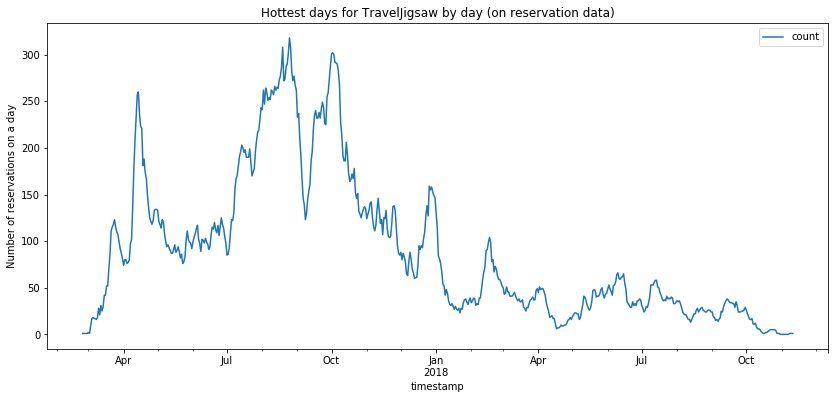

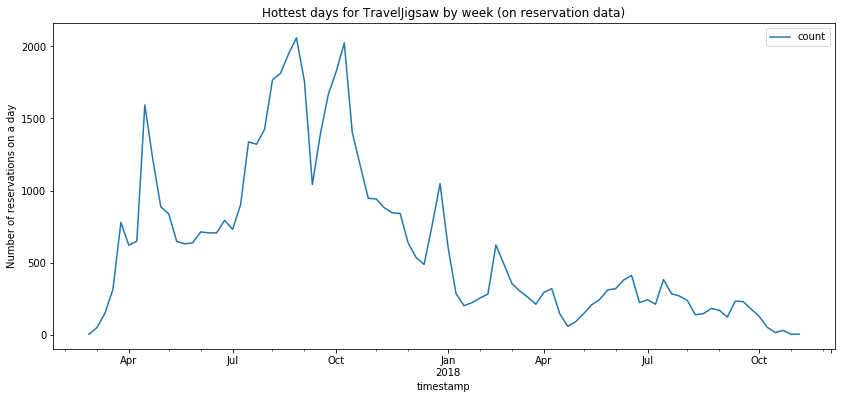

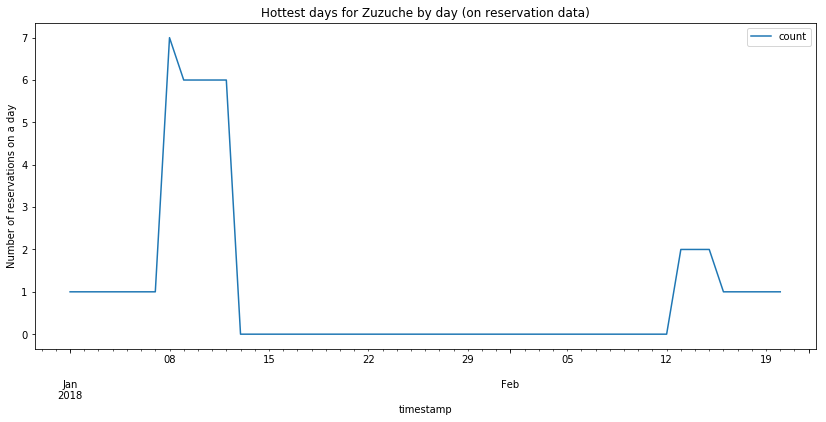

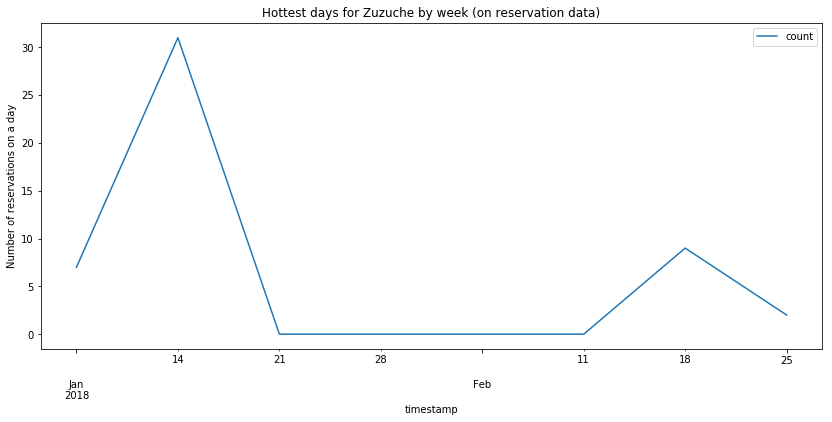

In [98]:
# For each contractor find hot dates.


broker_dict_res = {}
for group in df_res.groupby(df_res["Broker name"]):
    broker_dict_res[group[0]] = count_active_on_day(group[1])


for k,v in broker_dict_res.items():
    time_series_1 = pd.DataFrame(pd.Series(v))
    time_series_1.index.name = "timestamp"
    time_series_1.columns = ["count"] 
    df1=time_series_1.groupby(pd.Grouper(freq="D")).sum().plot(kind="line", title="Hottest days for "+ k +" by day (on reservation data)")
    df1.set_ylabel("Number of reservations on a day")
    df2 = time_series_1.groupby(pd.Grouper(freq="W")).sum().plot(kind="line", title="Hottest days for " + k + " by week (on reservation data)")
    df2.set_ylabel("Number of reservations on a day")
    
    